In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Thiết lập style cho biểu đồ
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\TANPHAT\hocotruong\Năm ba 2025-2026\HK1_A\Thu thập và tiền xử lý dữ liệu\Đồ_án_GDP\data\final_clean_dataset.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
dates = df['date']

# --- 2. Lấy DataFrame chỉ có dữ liệu số (để chuẩn hóa) ---
df_numeric = df.drop(columns=['date'])
numeric_columns = df_numeric.columns

# --- 3. Thực hiện Chuẩn hóa (Standardization) ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# --- 4. Tạo DataFrame tạm ĐÃ CHUẨN HÓA ---
# Gán dữ liệu đã chuẩn hóa vào một DataFrame tạm
df_scaled_temp = pd.DataFrame(scaled_data, columns=numeric_columns)

# --- 5. Thêm cột 'date' trở lại vào DataFrame tạm ---
df_scaled_temp['date'] = dates

# --- 6. Gán DataFrame đã chuẩn hóa trở lại vào biến 'df' (Theo yêu cầu) ---
df = df_scaled_temp

In [5]:
# 3. Tính toán ma trận tương quan
correlation_matrix = df.corr(numeric_only=True)

# 4. Trích xuất tương quan với 'gdp_growth_quarterly'
gdp_correlations = correlation_matrix['gdp_growth_quarterly'].sort_values(ascending=False)

# In ra các tương quan đã sắp xếp
print("--- Tương quan với gdp_growth_quarterly ---")
print(gdp_correlations)

# Kiểm tra cấu trúc dữ liệu
print("\n--- Cấu trúc DataFrame (Info) ---")
df.info()

--- Tương quan với gdp_growth_quarterly ---
gdp_growth_quarterly            1.000000
retail_value_quarterly          0.715952
oil_price_close                 0.330456
cpi_index_quarterly             0.151692
fdi_inflow_quarterly            0.064162
usd_vnd_close                  -0.156483
vnindex_close                  -0.162405
unemployment_value_quarterly   -0.760071
Name: gdp_growth_quarterly, dtype: float64

--- Cấu trúc DataFrame (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   oil_price_close               37 non-null     float64       
 1   usd_vnd_close                 37 non-null     float64       
 2   vnindex_close                 37 non-null     float64       
 3   fdi_inflow_quarterly          37 non-null     float64       
 4   cpi_index_quarterly           37 non-null     f

# Phân tích Biểu đồ Phân tán

- Biểu đồ 1 (Thất nghiệp): Hiển thị rõ xu hướng dốc xuống. Điểm ngoại lai (outlier) ở góc trên bên phải (Thất nghiệp cao, GDP âm sâu) chính là quý chịu ảnh hưởng nặng nề của COVID-19, điều này là hợp lý.

- Biểu đồ 2 (Bán lẻ): Hiển thị rõ xu hướng dốc lên, xác nhận chi tiêu tiêu dùng là động lực quan trọng của GDP.

Đã tạo biểu đồ: gdp_feature_correlation_scatter.png


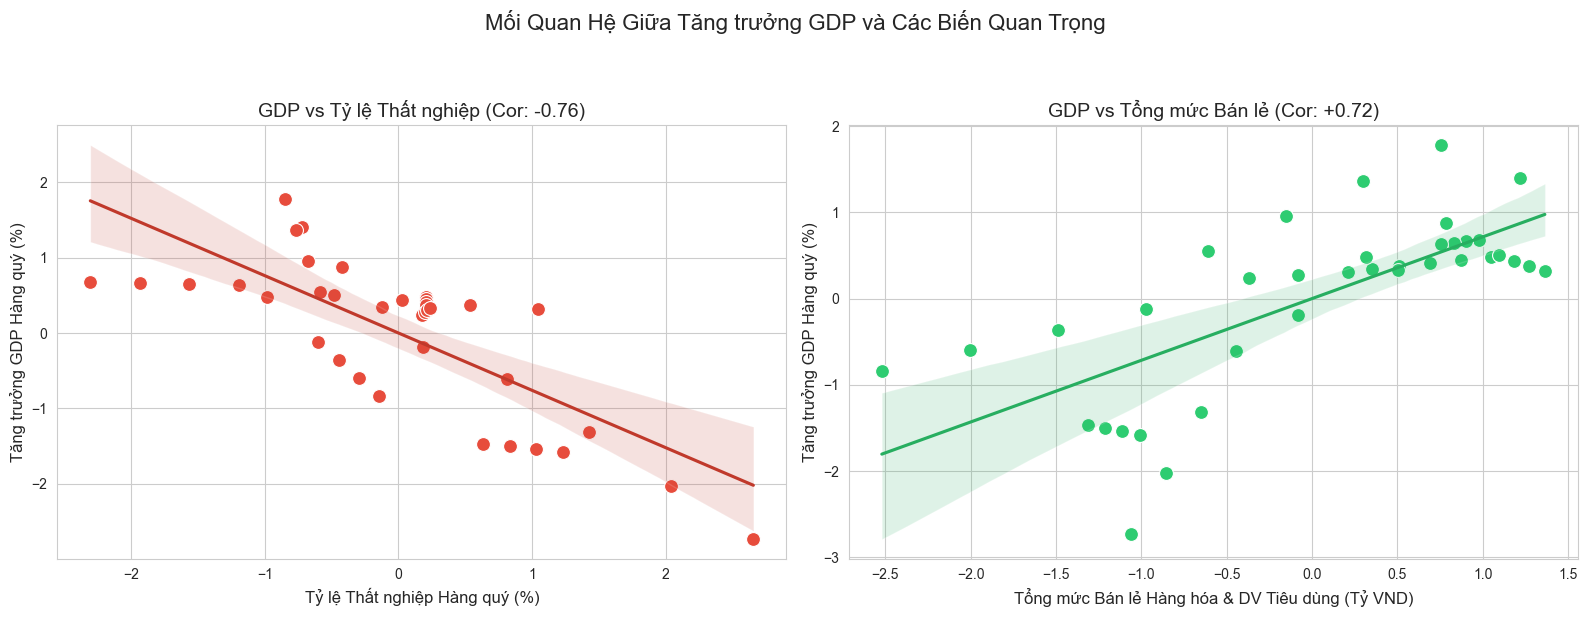

In [6]:
# Tạo 1 hàng, 2 cột cho 2 biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Mối Quan Hệ Giữa Tăng trưởng GDP và Các Biến Quan Trọng', fontsize=16, y=1.02)

# --- Biểu đồ 1: GDP vs Tỷ lệ Thất nghiệp (Tương quan Âm) ---
sns.scatterplot(
    ax=axes[0],
    x='unemployment_value_quarterly',
    y='gdp_growth_quarterly',
    data=df,
    color='#e74c3c', # Màu đỏ
    s=100
)
# Thêm đường hồi quy tuyến tính
sns.regplot(
    ax=axes[0],
    x='unemployment_value_quarterly',
    y='gdp_growth_quarterly',
    data=df,
    scatter=False,
    color='#c0392b'
)
axes[0].set_title(f'GDP vs Tỷ lệ Thất nghiệp (Cor: -0.76)', fontsize=14)
axes[0].set_xlabel('Tỷ lệ Thất nghiệp Hàng quý (%)', fontsize=12)
axes[0].set_ylabel('Tăng trưởng GDP Hàng quý (%)', fontsize=12)

# --- Biểu đồ 2: GDP vs Tổng mức Bán lẻ (Tương quan Dương) ---
sns.scatterplot(
    ax=axes[1],
    x='retail_value_quarterly',
    y='gdp_growth_quarterly',
    data=df,
    color='#2ecc71', # Màu xanh
    s=100
)
# Thêm đường hồi quy tuyến tính
sns.regplot(
    ax=axes[1],
    x='retail_value_quarterly',
    y='gdp_growth_quarterly',
    data=df,
    scatter=False,
    color='#27ae60'
)
axes[1].set_title(f'GDP vs Tổng mức Bán lẻ (Cor: +0.72)', fontsize=14)
axes[1].set_xlabel('Tổng mức Bán lẻ Hàng hóa & DV Tiêu dùng (Tỷ VND)', fontsize=12)
axes[1].set_ylabel('Tăng trưởng GDP Hàng quý (%)', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(r'C:\Users\Admin\Desktop\TANPHAT\hocotruong\Năm ba 2025-2026\HK1_A\Thu thập và tiền xử lý dữ liệu\Đồ_án_GDP\Bieudo\gdp_feature_correlation_scatter.png')
print("Đã tạo biểu đồ: gdp_feature_correlation_scatter.png")

# Phân tích Biểu đồ Xu hướng
- Biểu đồ 1 (GDP): Cho thấy tính chu kỳ và cú sốc COVID-19 (Q3/2021) khi GDP tăng trưởng âm.

- Biểu đồ 2 (GDP vs Thất nghiệp): Xác nhận Định luật Okun, hai đường di chuyển ngược chiều nhau một cách rõ rệt.

- Biểu đồ 3 (GDP vs Bán lẻ): Hai đường di chuyển gần như song song, cho thấy mối quan hệ đồng biến mạnh mẽ.

- Biểu đồ 4 (GDP vs CPI): Mối quan hệ ít rõ ràng hơn, cho thấy việc cân bằng giữa lạm phát và tăng trưởng là phức tạp.

Đã tạo biểu đồ: visualizations_set1_trends.png


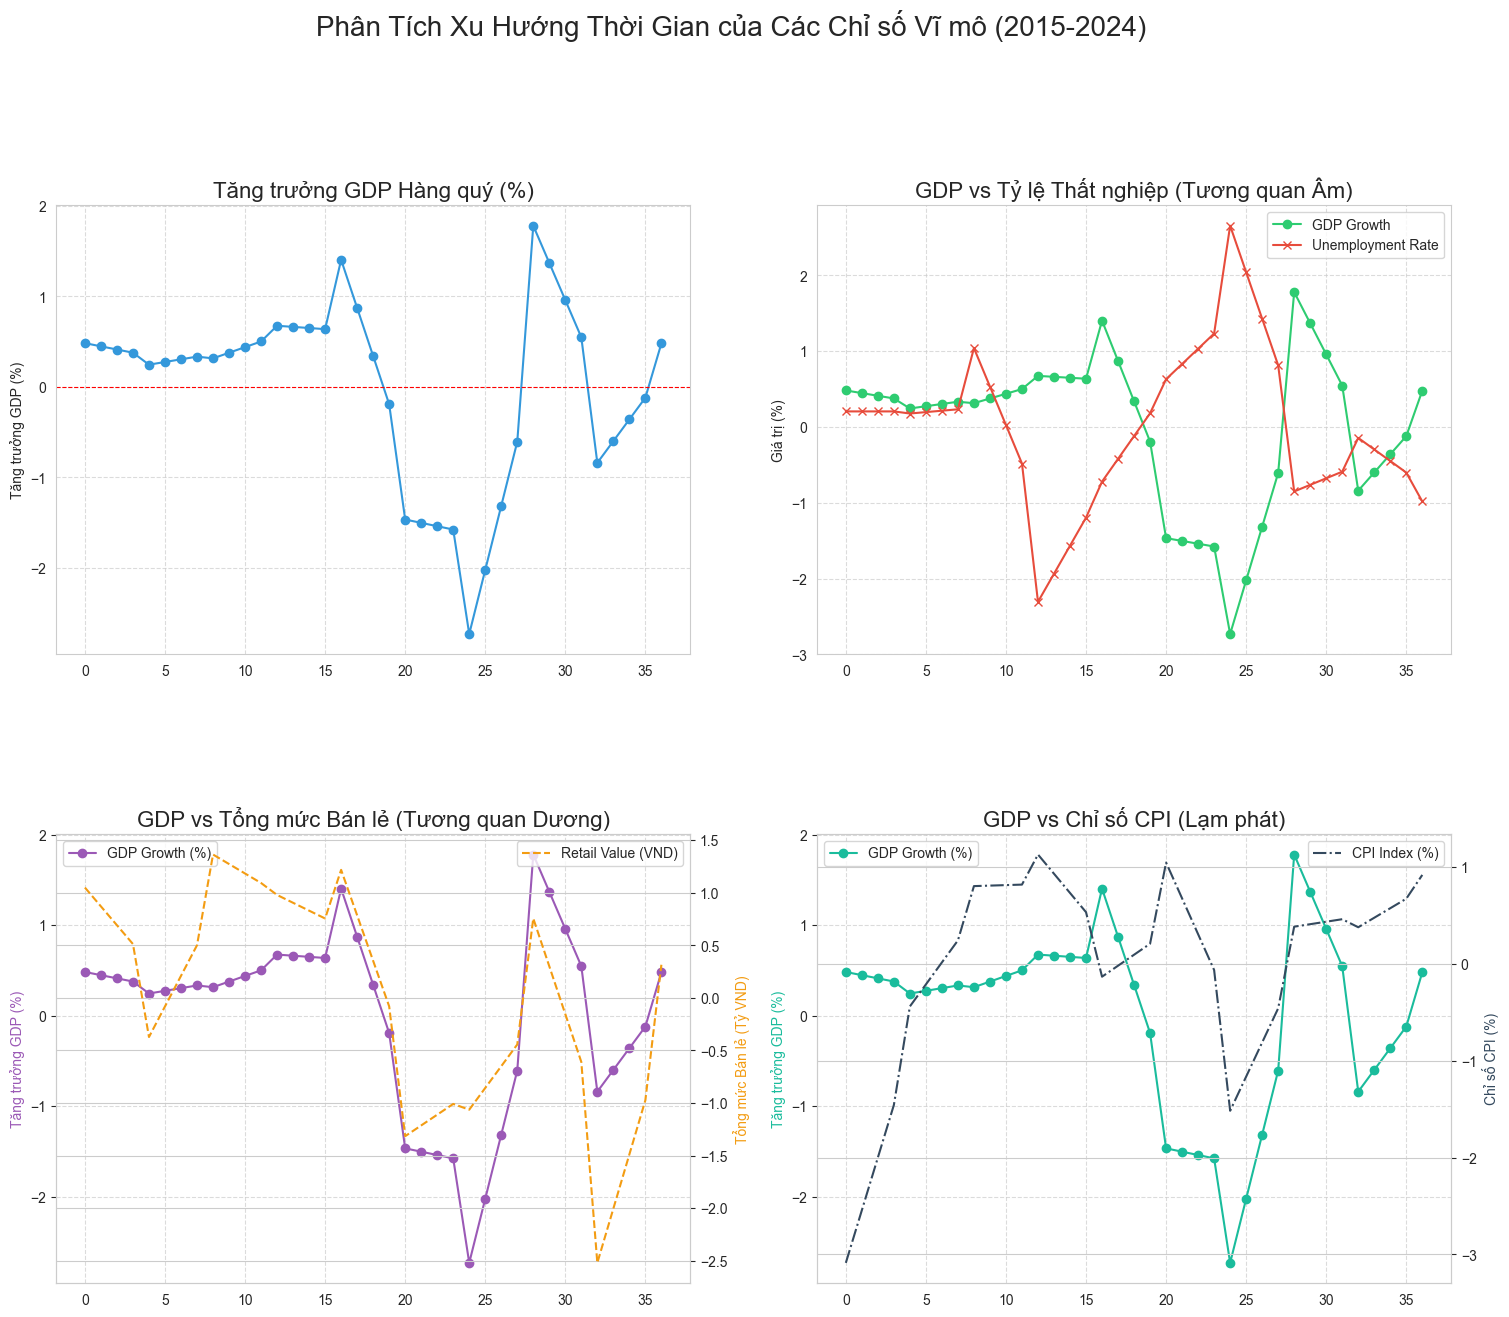

In [7]:
# Tạo 4 ô (2x2)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Phân Tích Xu Hướng Thời Gian của Các Chỉ số Vĩ mô (2015-2024)', fontsize=20, y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# Biểu đồ 1: Tăng trưởng GDP Hàng quý (%)
axes[0, 0].plot(df.index, df['gdp_growth_quarterly'], marker='o', color='#3498db')
axes[0, 0].set_title('Tăng trưởng GDP Hàng quý (%)', fontsize=16)
axes[0, 0].set_ylabel('Tăng trưởng GDP (%)')
axes[0, 0].grid(True, linestyle='--', alpha=0.7)
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=0.8) # Đường 0%

# Biểu đồ 2: GDP vs Tỷ lệ Thất nghiệp (Tương quan Âm)
axes[0, 1].plot(df.index, df['gdp_growth_quarterly'], label='GDP Growth', marker='o', color='#2ecc71')
axes[0, 1].plot(df.index, df['unemployment_value_quarterly'], label='Unemployment Rate', marker='x', color='#e74c3c')
axes[0, 1].set_title('GDP vs Tỷ lệ Thất nghiệp (Tương quan Âm)', fontsize=16)
axes[0, 1].set_ylabel('Giá trị (%)')
axes[0, 1].legend()
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Biểu đồ 3: GDP vs Tổng mức Bán lẻ (Tương quan Dương)
axes[1, 0].plot(df.index, df['gdp_growth_quarterly'], label='GDP Growth (%)', marker='o', color='#9b59b6')
ax3_twin = axes[1, 0].twinx() # Tạo trục Y thứ hai
ax3_twin.plot(df.index, df['retail_value_quarterly'], label='Retail Value (VND)', linestyle='--', color='#f39c12')
axes[1, 0].set_title('GDP vs Tổng mức Bán lẻ (Tương quan Dương)', fontsize=16)
axes[1, 0].set_ylabel('Tăng trưởng GDP (%)', color='#9b59b6')
ax3_twin.set_ylabel('Tổng mức Bán lẻ (Tỷ VND)', color='#f39c12')
axes[1, 0].legend(loc='upper left')
ax3_twin.legend(loc='upper right')
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# Biểu đồ 4: GDP vs Chỉ số CPI (Lạm phát)
axes[1, 1].plot(df.index, df['gdp_growth_quarterly'], label='GDP Growth (%)', marker='o', color='#1abc9c')
ax4_twin = axes[1, 1].twinx() # Tạo trục Y thứ hai
ax4_twin.plot(df.index, df['cpi_index_quarterly'], label='CPI Index (%)', linestyle='-.', color='#34495e')
axes[1, 1].set_title('GDP vs Chỉ số CPI (Lạm phát)', fontsize=16)
axes[1, 1].set_ylabel('Tăng trưởng GDP (%)', color='#1abc9c')
ax4_twin.set_ylabel('Chỉ số CPI (%)', color='#34495e')
axes[1, 1].legend(loc='upper left')
ax4_twin.legend(loc='upper right')
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

plt.savefig(r'C:\Users\Admin\Desktop\TANPHAT\hocotruong\Năm ba 2025-2026\HK1_A\Thu thập và tiền xử lý dữ liệu\Đồ_án_GDP\Bieudo\visualizations_set1_trends.png')
print("Đã tạo biểu đồ: visualizations_set1_trends.png")

# Phân tích Biểu đồ Hộp

- gdp_growth_quarterly có một điểm ngoại lai rõ ràng (giá trị âm), chính là quý COVID-19.

- unemployment_value_quarterly cũng có một điểm ngoại lai (giá trị cao) tương ứng.

- Các biến thị trường như vnindex_close và oil_price_close có độ phân tán (biên độ) rộng, phản ánh tính biến động cao.

Đã tạo biểu đồ: visualization_set2_boxplot.png


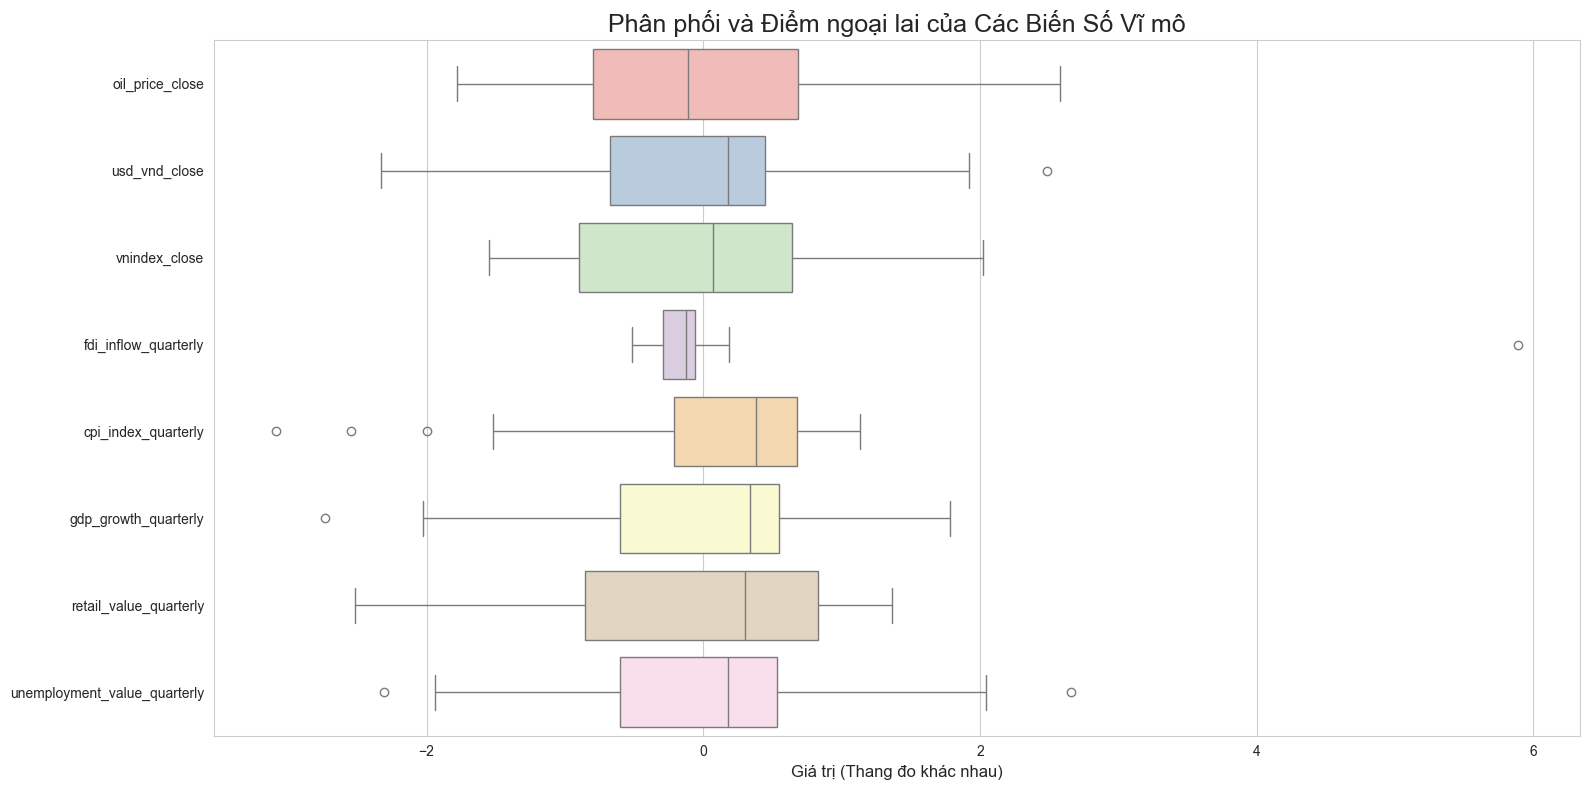

In [8]:
# Chọn các cột số để vẽ
box_plot_df = df.drop(columns=['date'])

plt.figure(figsize=(16, 8))
sns.boxplot(data=box_plot_df, palette="Pastel1", orient="h")
plt.title('Phân phối và Điểm ngoại lai của Các Biến Số Vĩ mô', fontsize=18)
plt.xlabel('Giá trị (Thang đo khác nhau)', fontsize=12)
plt.tight_layout()
plt.savefig(r'C:\Users\Admin\Desktop\TANPHAT\hocotruong\Năm ba 2025-2026\HK1_A\Thu thập và tiền xử lý dữ liệu\Đồ_án_GDP\Bieudo\visualization_set2_boxplot.png')
print("Đã tạo biểu đồ: visualization_set2_boxplot.png")

# Phân tích Biểu đồ Sâu
- Biểu đồ 6 (Tỷ giá vs Dầu): Cho thấy các yếu tố ngoại sinh. Tỷ giá USD/VND tăng dần đều, trong khi giá dầu biến động rất mạnh.

- Biểu đồ 7 (GDP vs FDI): Xác nhận trực quan mối tương quan yếu. FDI là dòng vốn dài hạn, ổn định, không biến động nhanh như GDP hàng quý.

- Biểu đồ 8 (GDP vs VN-Index): VN-Index (thị trường) có vẻ biến động nhanh và sớm hơn nền kinh tế thực (GDP).

- Biểu đồ 9 (Tự tương quan): Đây là một phát hiện quan trọng. Mối tương quan giữa GDP quý này và quý trước là rất mạnh (Cor ~ 0.67). Điều này có nghĩa là gdp_growth_quarterly_lag1 (GDP quý trước) là một feature dự đoán cực kỳ tốt.

Đã tạo biểu đồ: visualizations_set3_deep_analysis.png


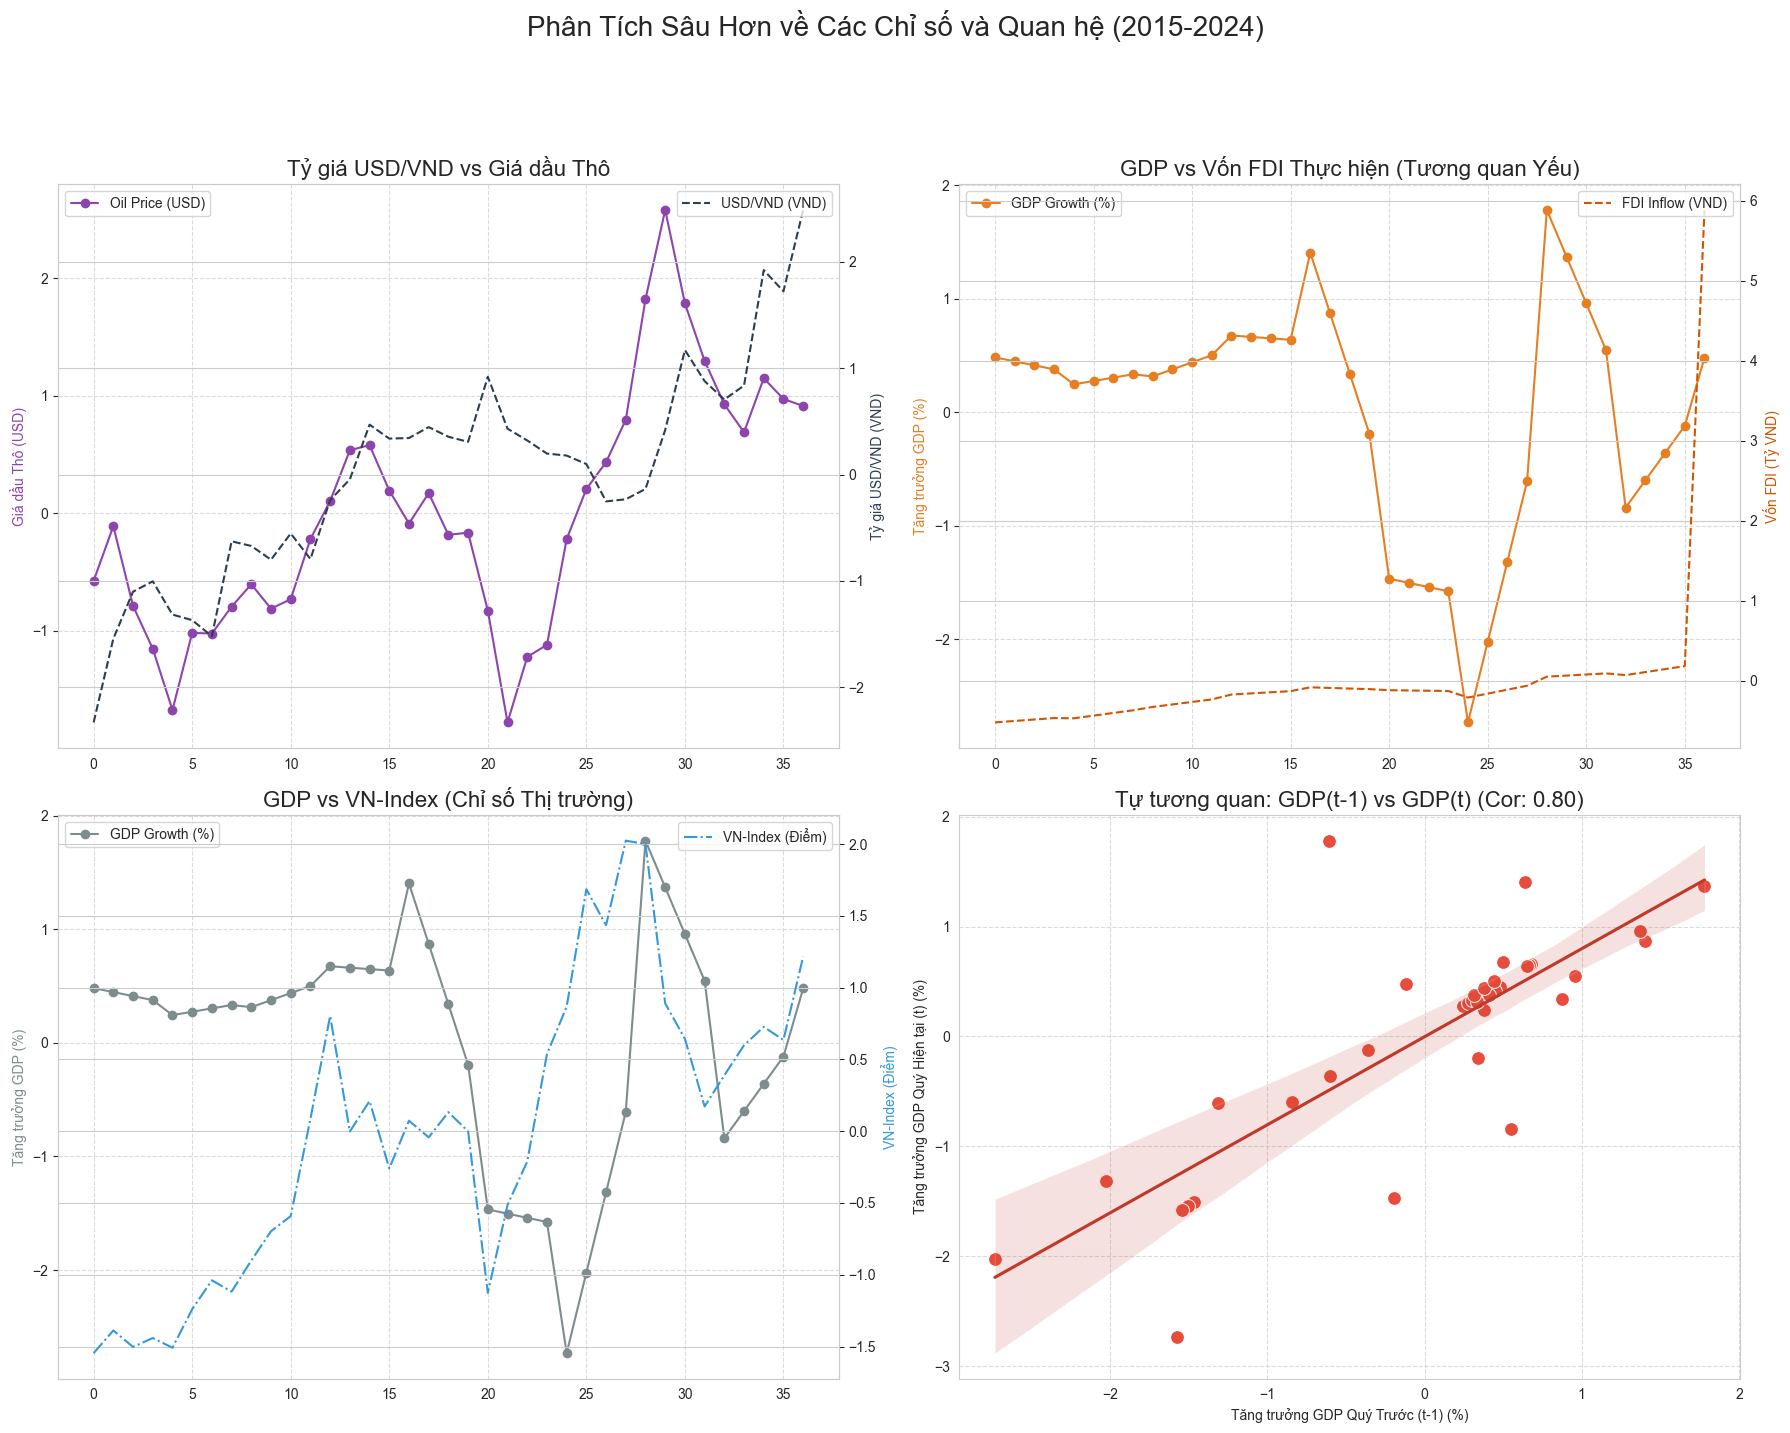

In [9]:
# Tạo feature độ trễ 1 quý cho GDP
df['gdp_growth_quarterly_lag1'] = df['gdp_growth_quarterly'].shift(1)

# Tạo 4 ô (2x2)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Phân Tích Sâu Hơn về Các Chỉ số và Quan hệ (2015-2024)', fontsize=20, y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# Biểu đồ 6: Tỷ giá USD/VND vs Giá dầu Thô
axes[0, 0].plot(df.index, df['oil_price_close'], label='Oil Price (USD)', marker='o', color='#8e44ad')
ax6_twin = axes[0, 0].twinx()
ax6_twin.plot(df.index, df['usd_vnd_close'], label='USD/VND (VND)', linestyle='--', color='#2c3e50')
axes[0, 0].set_title('Tỷ giá USD/VND vs Giá dầu Thô', fontsize=16)
axes[0, 0].set_ylabel('Giá dầu Thô (USD)', color='#8e44ad')
ax6_twin.set_ylabel('Tỷ giá USD/VND (VND)', color='#2c3e50')
axes[0, 0].legend(loc='upper left')
ax6_twin.legend(loc='upper right')
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Biểu đồ 7: GDP vs Vốn FDI Thực hiện
axes[0, 1].plot(df.index, df['gdp_growth_quarterly'], label='GDP Growth (%)', marker='o', color='#e67e22')
ax7_twin = axes[0, 1].twinx()
ax7_twin.plot(df.index, df['fdi_inflow_quarterly'], label='FDI Inflow (VND)', linestyle='--', color='#d35400')
axes[0, 1].set_title('GDP vs Vốn FDI Thực hiện (Tương quan Yếu)', fontsize=16)
axes[0, 1].set_ylabel('Tăng trưởng GDP (%)', color='#e67e22')
ax7_twin.set_ylabel('Vốn FDI (Tỷ VND)', color='#d35400')
axes[0, 1].legend(loc='upper left')
ax7_twin.legend(loc='upper right')
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Biểu đồ 8: GDP vs VN-Index
axes[1, 0].plot(df.index, df['gdp_growth_quarterly'], label='GDP Growth (%)', marker='o', color='#7f8c8d')
ax8_twin = axes[1, 0].twinx()
ax8_twin.plot(df.index, df['vnindex_close'], label='VN-Index (Điểm)', linestyle='-.', color='#3498db')
axes[1, 0].set_title('GDP vs VN-Index (Chỉ số Thị trường)', fontsize=16)
axes[1, 0].set_ylabel('Tăng trưởng GDP (%)', color='#7f8c8d')
ax8_twin.set_ylabel('VN-Index (Điểm)', color='#3498db')
axes[1, 0].legend(loc='upper left')
ax8_twin.legend(loc='upper right')
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# Biểu đồ 9: Tự tương quan: GDP(t-1) vs GDP(t)
df_lagged = df.dropna(subset=['gdp_growth_quarterly_lag1']) # Xóa dòng NaN đầu tiên
sns.scatterplot(
    ax=axes[1, 1],
    x='gdp_growth_quarterly_lag1',
    y='gdp_growth_quarterly',
    data=df_lagged,
    color='#e74c3c',
    s=100
)
sns.regplot(
    ax=axes[1, 1],
    x='gdp_growth_quarterly_lag1',
    y='gdp_growth_quarterly',
    data=df_lagged,
    scatter=False,
    color='#c0392b'
)
# Tính toán tương quan của độ trễ
lag_corr = df_lagged['gdp_growth_quarterly'].corr(df_lagged['gdp_growth_quarterly_lag1'])
axes[1, 1].set_title(f'Tự tương quan: GDP(t-1) vs GDP(t) (Cor: {lag_corr:.2f})', fontsize=16)
axes[1, 1].set_xlabel('Tăng trưởng GDP Quý Trước (t-1) (%)')
axes[1, 1].set_ylabel('Tăng trưởng GDP Quý Hiện tại (t) (%)')
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(r'C:\Users\Admin\Desktop\TANPHAT\hocotruong\Năm ba 2025-2026\HK1_A\Thu thập và tiền xử lý dữ liệu\Đồ_án_GDP\Bieudo\visualizations_set3_deep_analysis.png')
print("Đã tạo biểu đồ: visualizations_set3_deep_analysis.png")

In [ ]:
# Vẽ pair plot
sns_plot = sns.pairplot(df)
sns_plot.fig.suptitle("Ma trận Quan hệ của 3 Feature Mạnh nhất (GDP, Thất nghiệp, Bán lẻ)", y=1.02, fontsize=16)
sns_plot.savefig(r'C:\Users\Admin\Desktop\TANPHAT\hocotruong\Năm ba 2025-2026\HK1_A\Thu thập và tiền xử lý dữ liệu\Đồ_án_GDP\Bieudo\visualization_set3_pairplot.png')
print("Đã tạo biểu đồ: visualization_set3_pairplot.png")

Đã tạo biểu đồ: visualizations_set3_heatmap.png


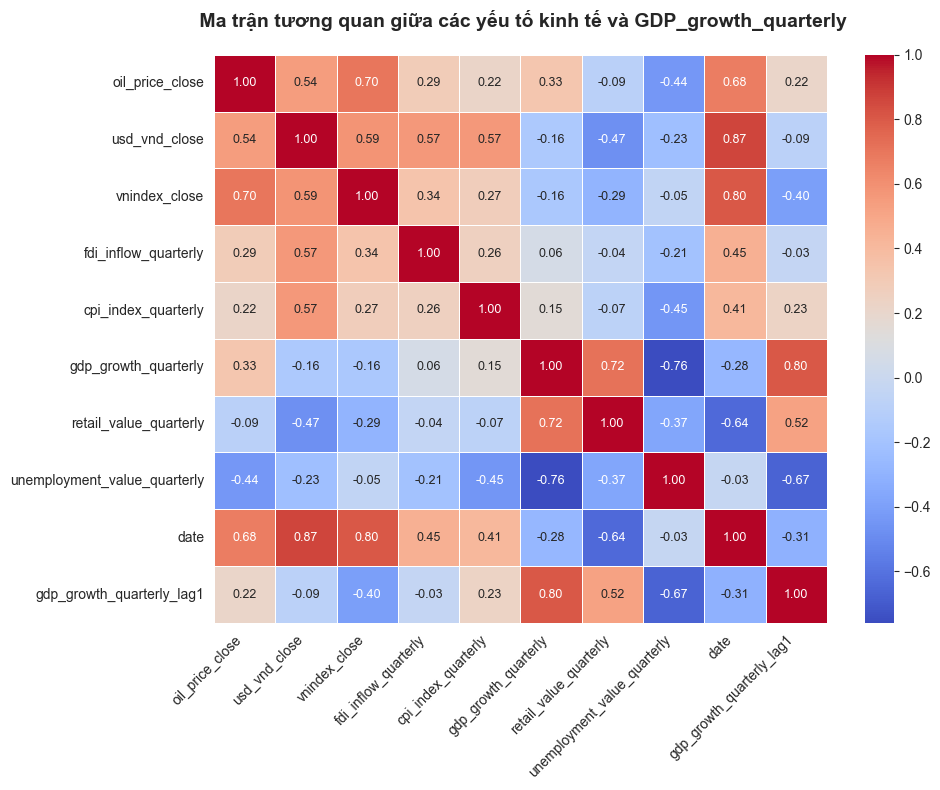

In [13]:
# Tính ma trận tương quan Pearson
corr = df.corr(method='pearson')

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 8))

# Tạo Heatmap
sns.heatmap(
    corr,
    annot=True,              # hiển thị hệ số tương quan
    cmap='coolwarm',         # bảng màu
    linewidths=0.5,          # độ dày đường chia
    fmt=".2f",               # định dạng số
    annot_kws={"size": 9}    # kích cỡ chữ
)


plt.title(
    " Ma trận tương quan giữa các yếu tố kinh tế và GDP_growth_quarterly",
    fontsize=14,
    fontweight='bold',
    pad=20
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(r'C:\Users\Admin\Desktop\TANPHAT\hocotruong\Năm ba 2025-2026\HK1_A\Thu thập và tiền xử lý dữ liệu\Đồ_án_GDP\Bieudo\visualizations_set3_heatmap.png')
print("Đã tạo biểu đồ: visualizations_set3_heatmap.png")
plt.show()